# **IMPORT LIBRARY**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix

# **READ DATA**

In [2]:
data = pd.read_csv("Clean_Loan_Predication.csv")

In [3]:
data.head()

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Rural,Semiurban,Urban
0,0,LP001002,Male,No,0,Graduate,No,5849,0.0,146,360.0,1.0,Urban,Y,0.0,0.0,1.0
1,1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,N,1.0,0.0,0.0
2,2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,Y,0.0,0.0,1.0
3,3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,Y,0.0,0.0,1.0
4,4,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,Y,0.0,0.0,1.0


# **DATA SPLIT**

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X = data[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']]
y = data[['Loan_Status']]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

# **DATA NORMALISASI**

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
ss = StandardScaler()
X_train_std = ss.fit_transform(X_train)
X_test_std = ss.transform(X_test)

# **ALGORITMA KNN**

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
modelKnn = KNeighborsClassifier()
modelKnn.fit(X_train_std,y_train)

knn_pred = modelKnn.predict(X_test_std)
akurasi_KNN = accuracy_score(y_test, knn_pred)
print("Akurasi algoritma KNN :", round(akurasi_KNN,2))

Akurasi algoritma KNN : 0.81


C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


# **ALGORITMA NAIVE BAYES**

In [11]:
from sklearn.naive_bayes import GaussianNB

In [12]:
gaussnb  = GaussianNB()
gaussnb.fit(X_train_std,y_train)

gaussnb_pred = gaussnb.predict(X_test_std)
akurasi_gnb = accuracy_score(y_test, gaussnb_pred)
print("Akurasi algoritma Naive Bayes :", round(akurasi_gnb,2))

Akurasi algoritma Naive Bayes : 0.82


C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# **ALGORITMA SVM**

In [13]:
from sklearn.svm import SVC

In [29]:
svm = SVC()
svm.fit(X_train_std,y_train)

svm_pred = svm.predict(X_test_std)
akurasi_svm = accuracy_score(y_test, svm_pred)
print("Akurasi algoritma SVC :", round(akurasi_svm,2))

Akurasi algoritma SVC : 0.84


C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# **PERBANDINGAN AKURASI SETIAP ALGORITMA**

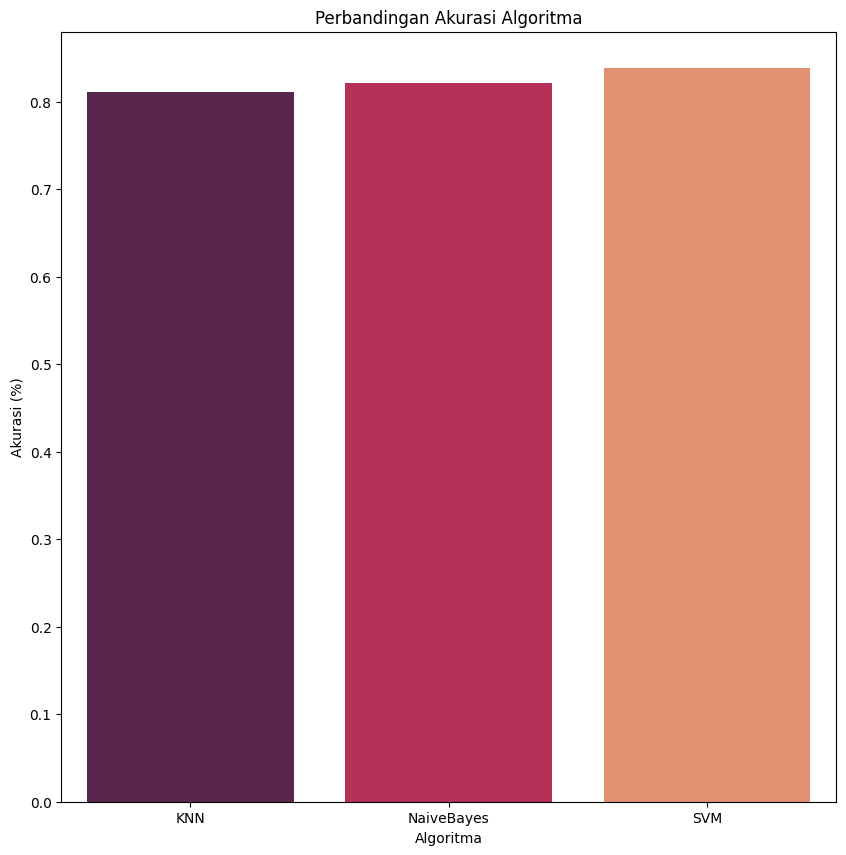

In [15]:
algoritma = ["KNN","NaiveBayes","SVM"]
akurasi = [akurasi_KNN,akurasi_gnb,akurasi_svm]

plt.figure(figsize=(10,10))

sns.barplot(x= algoritma,y = akurasi,palette='rocket')

plt.title("Perbandingan Akurasi Algoritma")
plt.ylabel("Akurasi (%)")
plt.xlabel("Algoritma")
plt.show()

# **CONFUSION MATRIX**

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Confusion matrix : 

 [[ 12  47]
 [ 19 107]]


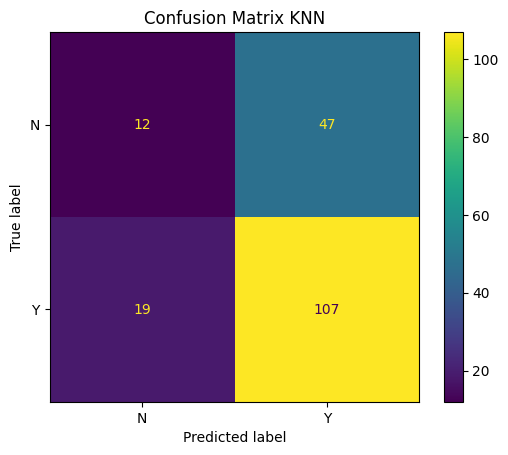

In [17]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

knn_pred = knn.predict(X_test)

cm = confusion_matrix(y_test, knn_pred)
print('Confusion matrix : \n\n', cm)

displays = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=knn.classes_)
displays.plot()

plt.title("Confusion Matrix KNN")
plt.grid(False)

# **HYPERPARAMETER TUNING (KNN)**

In [18]:
from sklearn.model_selection import GridSearchCV

In [26]:
modelKNN = KNeighborsClassifier()

param_grid = { "n_neighbors" :[i for i in range(0,5)]}

gsv = GridSearchCV(estimator=modelKNN, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1)

gs = gsv.fit(X_train, y_train)

C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
3 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py", line 207, in fit
    return self._fit(X, y)
  File "C:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\nei

In [27]:
#parameter terbaik
print(gs.best_params_)

{'n_neighbors': 3}


In [28]:
print("Akurasi Training Set : ",round(gs.score(X_train,y_train)*100,1),"%")

Akurasi Training Set :  79.5 %
